In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import multivariate_normal

In [2]:
plt.rcParams['figure.figsize'] = (14, 5)

n_samples = 100
grid_levels = 100

# Gaussian distribution

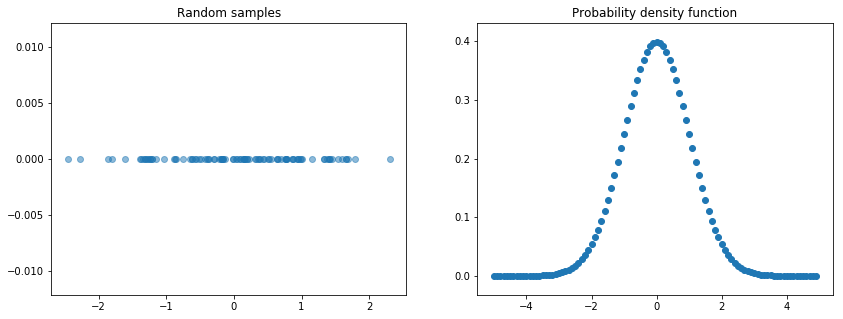

In [3]:
class Gaussian(object):
    def __init__(self, mean=[0], cov=[1]):
        self.mean = np.array(mean)
        self.cov = np.array(cov)
        self.rv = multivariate_normal(mean=self.mean, cov=self.cov)
        self.n_features = len(mean)
        
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        return self.rv.pdf(x)
    
    def sample(self, size=None, **kwargs):
        return self.rv.rvs(size)
    
    def __str__(self):
        return 'Mean = {}, Cov = {}'.format(self.mean, self.cov)

g = Gaussian()
x = g.sample(n_samples)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Random samples')
ax1.scatter(x, np.zeros(n_samples), alpha=0.5)

x = np.linspace(-5, 5, grid_levels, endpoint=False)
y = g.pdf(x)
ax2 = fig.add_subplot(122)
ax2.set_title('Probability density function')
ax2.scatter(x, y)

# Multivariate Gaussian distribution

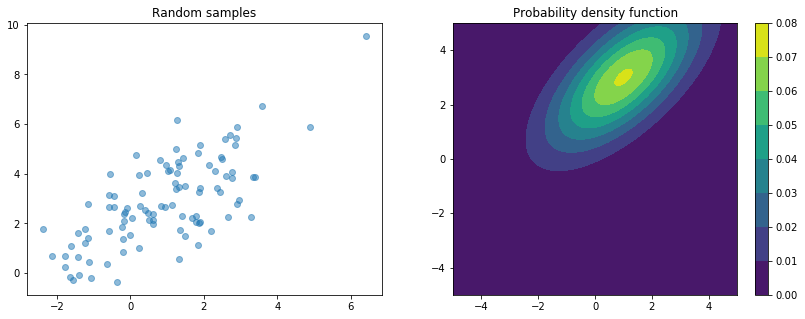

In [4]:
g = Gaussian(mean=[1,3], cov=[[3,2], [2,3]])
x = g.sample(n_samples)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Random samples')
ax1.scatter(x[:,0], x[:,1], alpha=0.5)

x = np.linspace(-5, 5, grid_levels)
y = np.linspace(-5, 5, grid_levels)
xx, yy = np.meshgrid(x, y)
z = g.pdf(np.vstack([xx.flatten(), yy.flatten()]).T)

ax2 = fig.add_subplot(122)
ax2.set_title('Probability density function')
contour = ax2.contourf(xx, yy, z.reshape(grid_levels,grid_levels))
fig.colorbar(contour)

# Mixture of Gaussians

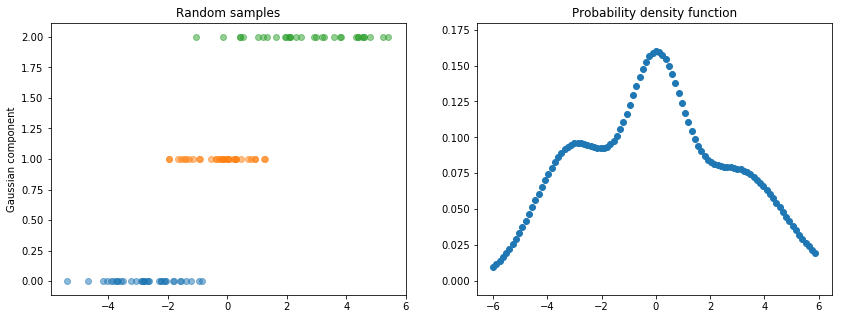

In [5]:
class MixtureDistribution(object):
    def __init__(self, priors, distributions):
        self.priors = np.array(priors)
        self.distributions = distributions
        
    def sample(self, size=None):
        if size is None:
            size = len(self.priors)
        classes = np.random.multinomial(n=1, pvals=self.priors, size=size)
        samples = np.zeros((size, self.distributions[0].n_features))
        for i, size in enumerate(classes.sum(axis=0)):
            samples[np.where(classes[:,i])[0]] = self.distributions[i].sample(size).reshape(-1, self.distributions[0].n_features)
        return samples, classes
    
    def posterior(self, pvalues, c=0):
        likelihoods = np.array([d.pdf(pvalues) for d in self.distributions])
        Z = np.dot(likelihoods, self.priors)
        return np.divide(likelihoods[c]*self.priors[c], Z)
    
    def pdf(self, pvalues):
        likelihoods = np.array([d.pdf(pvalues) for d in self.distributions])
        return np.dot(self.priors, likelihoods)

    def __repr__(self):
        string = ''
        for p, d in zip(self.priors, self.distributions):
            string += 'prior = {}, '.format(p)
            string += 'Distribution = {}'.format(d)
            string += '\n'
        return string

mg = MixtureDistribution(priors=[1/3, 1/3, 1/3],
                         distributions=[Gaussian([-3], [2]),
                                        Gaussian([0], [1]),
                                        Gaussian([3], [3])])

x, y = mg.sample(n_samples)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Random samples')
for i in range(y.shape[1]):
    ax1.scatter(x[np.where(y[:,i])], np.ones(sum(y[:,i]))*i, alpha=0.5)
ax1.set_ylabel('Gaussian component')

x = np.linspace(-6, 6, grid_levels, endpoint=False)
y = mg.pdf(x)

ax2 = fig.add_subplot(122)
ax2.set_title('Probability density function')
ax2.scatter(x, y)

# Mixture of Multivariate Gaussian distribution

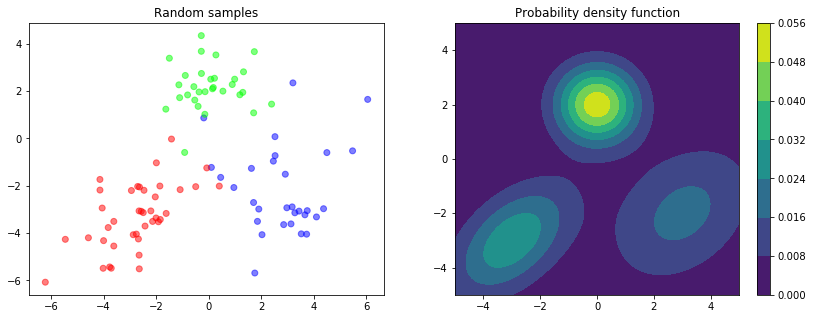

In [6]:
mg = MixtureDistribution(priors=[1/3, 1/3, 1/3],
                         distributions=[Gaussian([-3, -3], [[2, 1], [1, 2]]),
                                        Gaussian([0, 2], [[1, 0], [0, 1]]),
                                        Gaussian([3, -2], [[3, 1], [1, 3]])])
x, y = mg.sample(n_samples)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('Random samples')
ax1.scatter(x[:,0], x[:,1], color=y, alpha=0.5)

x = np.linspace(-5, 5, grid_levels)
y = np.linspace(-5, 5, grid_levels)
xx, yy = np.meshgrid(x, y)
z = mg.pdf(np.vstack([xx.flatten(), yy.flatten()]).T)

ax2 = fig.add_subplot(122)
ax2.set_title('Probability density function')
contour = ax2.contourf(xx, yy, z.reshape(grid_levels,grid_levels))
fig.colorbar(contour)